In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
basis = pd.read_csv('Basis.csv')
basis['city'] = basis['location_city'].str.strip()
basis['crop'] = basis['commodity'].str.strip()
basis['type'] = basis['elevator_feed'].str.strip()
basis['date'] = pd.to_datetime(basis['date'], format="%Y%m%d").dt.date
basis = basis.sort_values('date')
basis['basistype'] = basis['basistype'].str.strip()
basis = basis.drop(columns=['Unnamed: 0', '__fileposition__', 'location_city', 'elevator_feed', 'commodity'])
corn = basis[basis['crop']=='corn']
wheat = basis[basis['crop']=='wheat']
soy = basis[basis['crop']=='soybeans']

NameError: name 'pd' is not defined

In [85]:
avg = pd.read_csv('Avg_Basis.csv')
avg['city'] = avg['location_city'].str.strip()
avg['crop'] = avg['commodity'].str.strip()
avg['type'] = avg['elevator_feed'].str.strip()
avg = avg.sort_values('dayofyear')
avg['basistype'] = avg['basistype'].str.strip()
avg = avg.drop(columns=['Unnamed: 0', '__fileposition__', 'location_city', 'elevator_feed', 'commodity'])

In [86]:
avg.head()

,month,day,dayofyear,contractmonth,basistype,averagebasis,min,max,city,crop,type
0,1,1,1,3,relative,1.056360,0.997862,1.099432,Bladenboro,corn,elevator
231,1,1,1,5,net,0.108500,-0.080000,0.212500,Elizabeth_City,corn,elevator
230,1,1,1,3,net,0.181000,0.002500,0.300000,Elizabeth_City,corn,elevator
229,1,1,1,11,relative,0.939755,0.874632,0.988563,Creswell,soybeans,elevator
228,1,1,1,9,relative,0.936096,0.881703,0.976424,Creswell,soybeans,elevator


In [71]:
print("crop   cities   rows")
for c in basis['crop'].unique():
    crop = basis[basis['crop']==c]
    crop = crop[crop['basistype']=='net']
    cities = len(crop['city'].unique())
    rows = len(crop)
    print(f'{c:8s} {cities:4d} {rows:6d}')

crop   cities   rows
corn       19 153200
wheat       9  68940
soybeans    5  38300


In [61]:
basis.head()

,date,basistype,basis,city,crop,month,type
0,2015-01-01,net,0.250000,Bladenboro,corn,3,elevator
383003,2015-01-01,relative,0.656013,Bladenboro,wheat,5,feed_mill
383002,2015-01-01,net,-2.045000,Bladenboro,wheat,5,feed_mill
383001,2015-01-01,relative,0.661297,Bladenboro,wheat,3,feed_mill
383000,2015-01-01,net,-1.997500,Bladenboro,wheat,3,feed_mill


In [118]:
def show5(location, w='elevator', basis='relative'):
    _df = corn[(corn['city']==location)&(corn['type']==w)&(corn['basistype']==basis)]
    #_df = _df.iloc[:100]
    plt.figure(figsize=(15,5))
    plt.title(f'{location} {w} {basis}')
    for m in np.sort(_df['contractmonth'].unique()):
        _ = _df[_df['contractmonth']==m]
        plt.plot(_['date'], _['basis'], label=str(m))
    plt.legend()

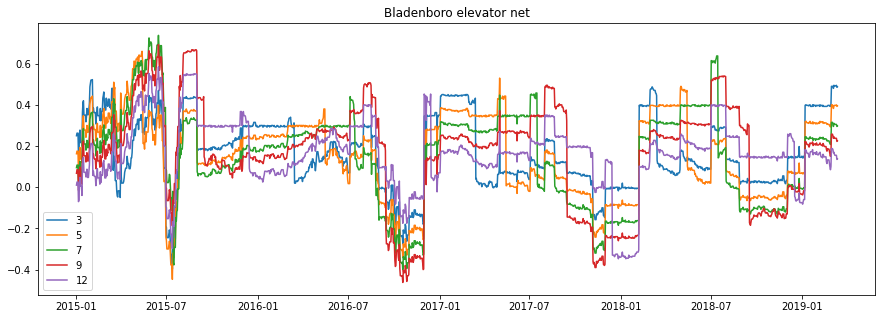

In [122]:
location = "Bladenboro"
w = 'elevator'
#show5(location, 'elevator')
plt.show()
show5(location, 'elevator', basis='net')

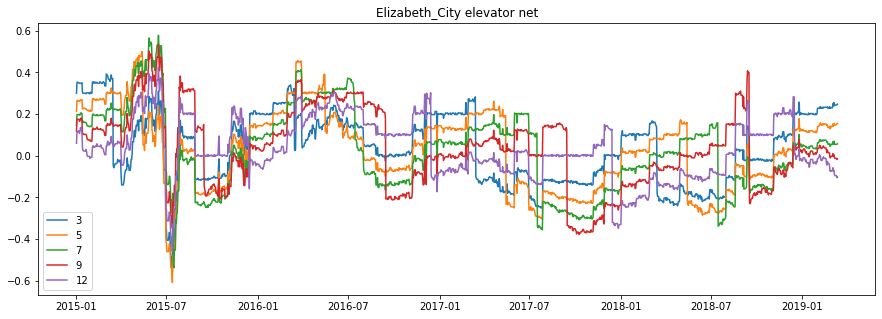

In [123]:
location = "Elizabeth_City"
w = 'elevator'
#show5(location, 'elevator')
plt.show()
show5(location, 'elevator', basis='net')

In [148]:
def show25(month, w='elevator', basis='relative'):
    _df = corn[(corn['contractmonth']==month)&(corn['type']==w)&(corn['basistype']==basis)]
    #_df = _df.iloc[:100]
    plt.figure(figsize=(15,5))
    plt.title(f'{location} {w} {basis}')
    for m in ['Bladenboro', 'Elizabeth_City', 'Creswell']: #np.sort(_df['contractmonth'].unique()):
        _ = _df[_df['city']==m]
        plt.plot(_['date'], _['basis'], label=str(m))
    plt.legend()

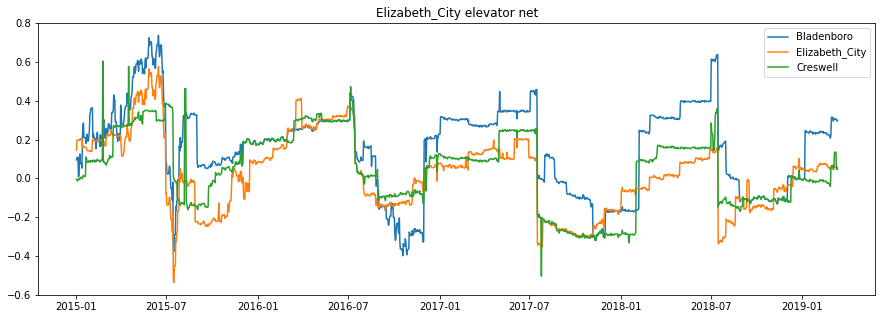

In [149]:
show25(7, basis='net')

In [145]:
basis['city'].unique()

array(['Bladenboro', 'Clarkton', 'Norwood', 'Clinton', 'Elizabeth_City',
       'Laurinburg', 'Creswell', 'Fayetteville', 'Rose_Hill_1', 'Warsaw',
       'Wilson', 'Mount_Olive', 'Lagrange', 'Candor', 'Nashville',
       'Roaring_River', 'Pantego_2', 'Monroe', 'Warsaw_2', 'Cofield',
       'Statesville'], dtype=object)

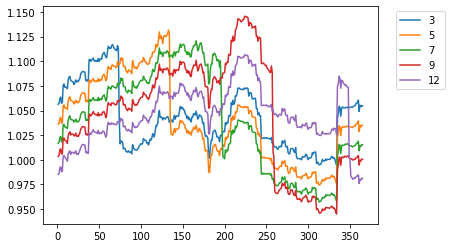

In [117]:
_ = avg[avg['crop']=='corn']
_ = _[_['basistype']=='relative']
_ = _[_['city']=='Bladenboro']
_ = _[_['type']=='elevator']
for m in np.sort(_['contractmonth'].unique()):
    __ = _[_['contractmonth']==m]
    plt.plot(__['dayofyear'], __['averagebasis'], label=str(m))
plt.legend(loc='upper left', bbox_to_anchor=(1.04,1.0))

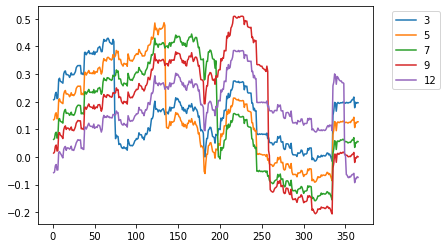

In [116]:
_ = avg[avg['crop']=='corn']
_ = _[_['basistype']=='net']
_ = _[_['city']=='Bladenboro']
_ = _[_['type']=='elevator']
for m in np.sort(_['contractmonth'].unique()):
    __ = _[_['contractmonth']==m]
    plt.plot(__['dayofyear'], __['averagebasis'], label=str(m))
plt.legend(loc='upper left', bbox_to_anchor=(1.04,1.0))

# OLD STUFF

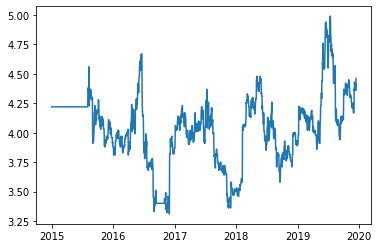

In [55]:
_df = corn[(corn['location_city']=="Bladenboro")&(corn['elevator_feed']=='elevator')]
plt.plot(_df['date'], _df['mars'])

In [6]:
def showCrop(loc, commodity, additive=False):
    _df = basis[basis['commodity']==commodity]
    _df = _df[_df['location_city']==loc]
    for m in _df['contractmonth'].unique():
        _row = _df[_df['contractmonth'] == m]
        plt.plot(_row['day_of_year'], _row['averagebasisrelative'], label=m)
    plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.75))
    plt.title('Relative basis for ' + loc)
    plt.show()

    if additive:
        for m in _df['contractmonth'].unique():
            _row = _df[_df['contractmonth'] == m]
            plt.plot(_row['day_of_year'], _row['averagebasisadditive'], label=m)
        plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.75))
        plt.title('Additive basis for ' + loc)

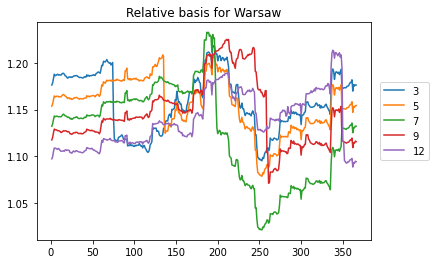

In [8]:
showCrop('Warsaw', 'corn')

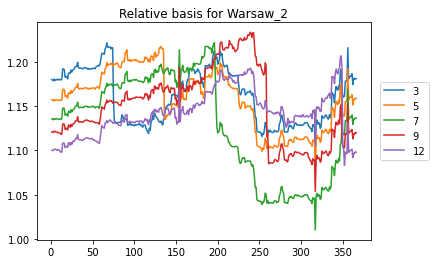

In [9]:
showCrop('Warsaw_2', 'corn')

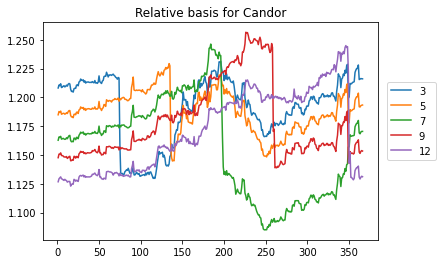

In [10]:
showCrop('Candor', 'corn')

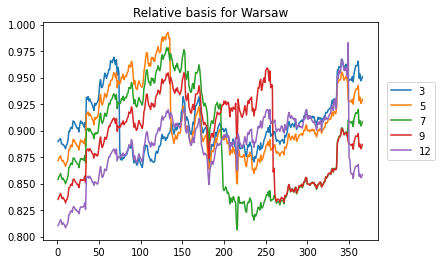

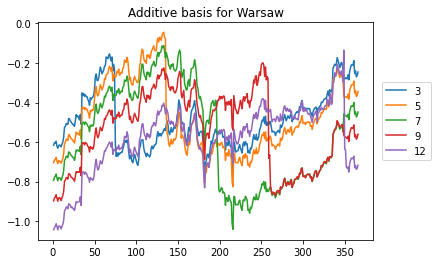

In [11]:
showCrop('Warsaw', 'wheat', additive=True)

In [12]:
def showCropContract(month, commodity, additive=False):
    _df = basis[basis['commodity']==commodity]
    _df = _df[_df['contractmonth']==month]
    for l in _df['location_city'].unique():
        _row = _df[_df['location_city'] == l]
        plt.plot(_row['day_of_year'], _row['averagebasisrelative'], label=l)
    plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))
    plt.show()

    if not additive:
        return
    _df = basis[basis['commodity']==commodity]
    _df = _df[_df['contractmonth']==month]
    for l in _df['location_city'].unique():
        _row = _df[_df['location_city'] == l]
        plt.plot(_row['day_of_year'], _row['averagebasisadditive'], label=l)
    plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))       

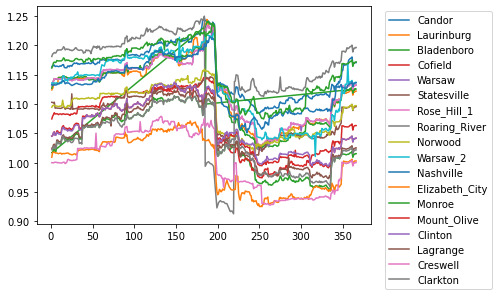

In [13]:
showCropContract(7, 'corn')

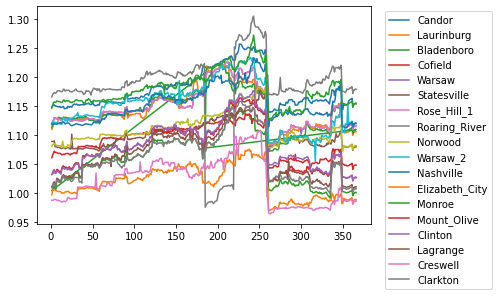

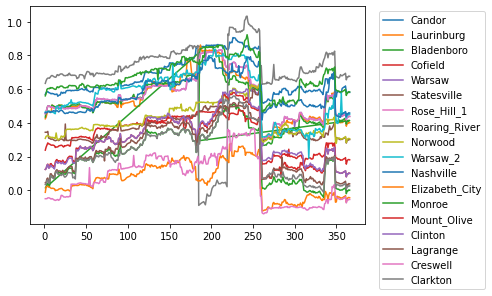

In [14]:
showCropContract(9, 'corn', additive=True)

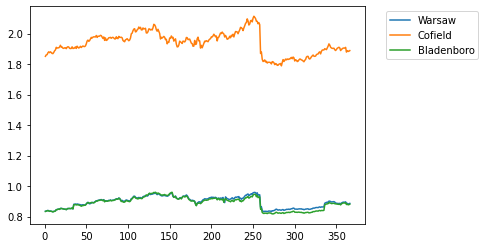

In [15]:
showCropContract(9, 'wheat')

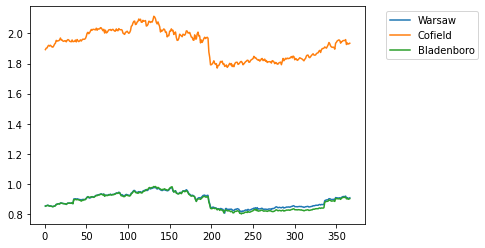

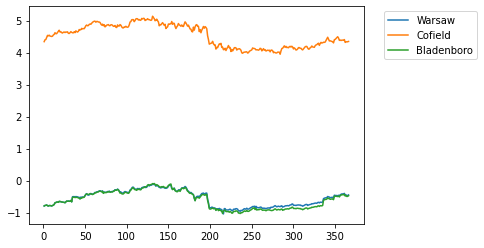

In [16]:
showCropContract(7, 'wheat', additive=True)

In [69]:
df = pd.read_csv('basis.csv')
df = df.drop(columns=['Unnamed: 0', '__fileposition__'])
df['location_city'] = df['location_city'].str.strip()
df['commodity'] = df['commodity'].str.strip()
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")
df['date'] = df['date'].dt.date

In [70]:
df

,date,location_city,commodity,elevator_feed,contractmonth,relativebasis,additivebasis,mars,cme
0,2015-01-01,Elizabeth_City,corn,elevator,9,0.706077,-1.7775,4.27,6.0475
1,2015-01-01,Elizabeth_City,corn,elevator,5,0.718251,-1.6750,4.27,5.9450
2,2015-01-01,Elizabeth_City,corn,elevator,12,0.694591,-1.8775,4.27,6.1475
3,2015-01-01,Elizabeth_City,corn,elevator,7,0.714644,-1.7050,4.27,5.9750
4,2015-01-01,Elizabeth_City,corn,elevator,3,0.724036,-1.6275,4.27,5.8975
...,...,...,...,...,...,...,...,...,...
198765,2019-12-13,Norwood,corn,elevator,5,1.049516,0.2175,4.61,4.3925
198766,2019-12-13,Norwood,corn,elevator,7,0.859674,-0.7525,4.61,5.3625
198767,2019-12-13,Norwood,corn,elevator,12,0.854891,-0.7825,4.61,5.3925
198768,2019-12-13,Norwood,corn,elevator,9,0.949048,-0.2475,4.61,4.8575


In [72]:
wdf = df[df['commodity']=='wheat']

In [73]:
cdf = df[df['commodity']=='corn']

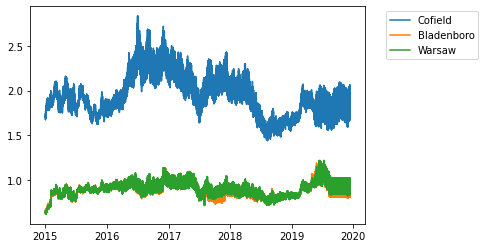

In [75]:
for loc in wdf['location_city'].unique():
    _ = wdf[wdf['location_city']==loc]
    plt.plot(_['date'], _['relativebasis'], label=loc)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))

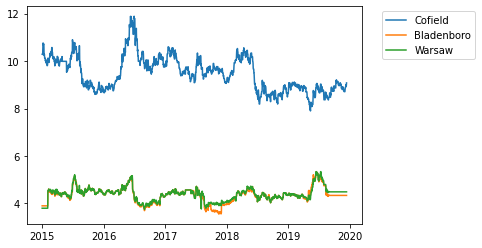

In [95]:
for loc in wdf['location_city'].unique():
    _ = wdf[wdf['location_city']==loc]
    plt.plot(_['date'], _['mars'], label=loc)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))

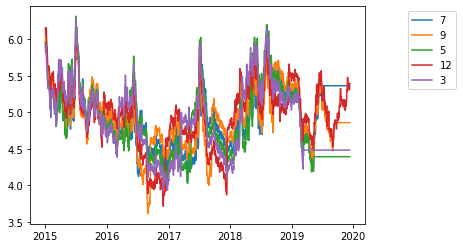

In [96]:
for m in wdf['contractmonth'].unique():
    _ = wdf[wdf['contractmonth']==m].sort_values('date')
    plt.plot(_['date'], _['cme'], label=m)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))

In [109]:
_p = wdf[wdf['date'] == pd.to_datetime('2019/12/01')]
_p[_p['location_city']=='Cofield']

,date,location_city,commodity,elevator_feed,contractmonth,relativebasis,additivebasis,mars,cme
152655,2019-12-01,Cofield,wheat,feed_mill,5,1.985202,4.3275,8.72,4.3925
152656,2019-12-01,Cofield,wheat,feed_mill,9,1.795162,3.8625,8.72,4.8575
152657,2019-12-01,Cofield,wheat,feed_mill,7,1.626107,3.3575,8.72,5.3625
152658,2019-12-01,Cofield,wheat,feed_mill,12,1.592694,3.2450,8.72,5.4750
152659,2019-12-01,Cofield,wheat,feed_mill,3,1.945343,4.2375,8.72,4.4825
